In [19]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

probabilities = list(np.arange(0,0.11,0.02))
L = 500
N = 50
vmax = 5
tmax = 500

# Plotting behaviour for different probabilities

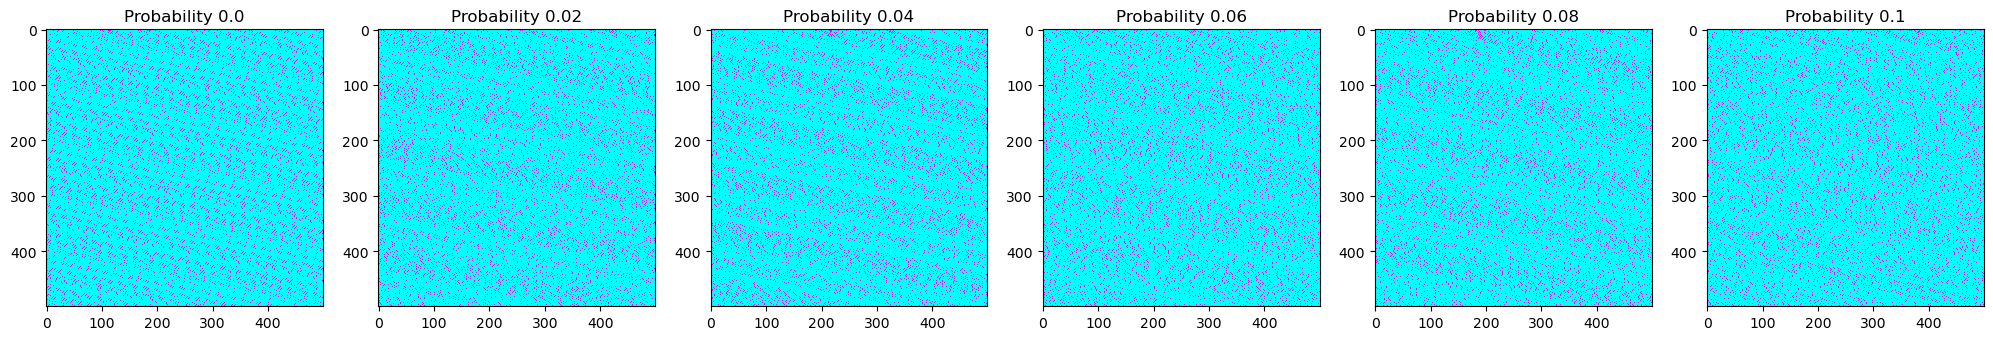

In [20]:
fig, axs = plt.subplots(1,len(probabilities), figsize = (25, 5))
for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[0]
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[probabilities.index(p)].set_title(f'Probability {round(p,2)}')
    axs[probabilities.index(p)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()



# Cluster distributions

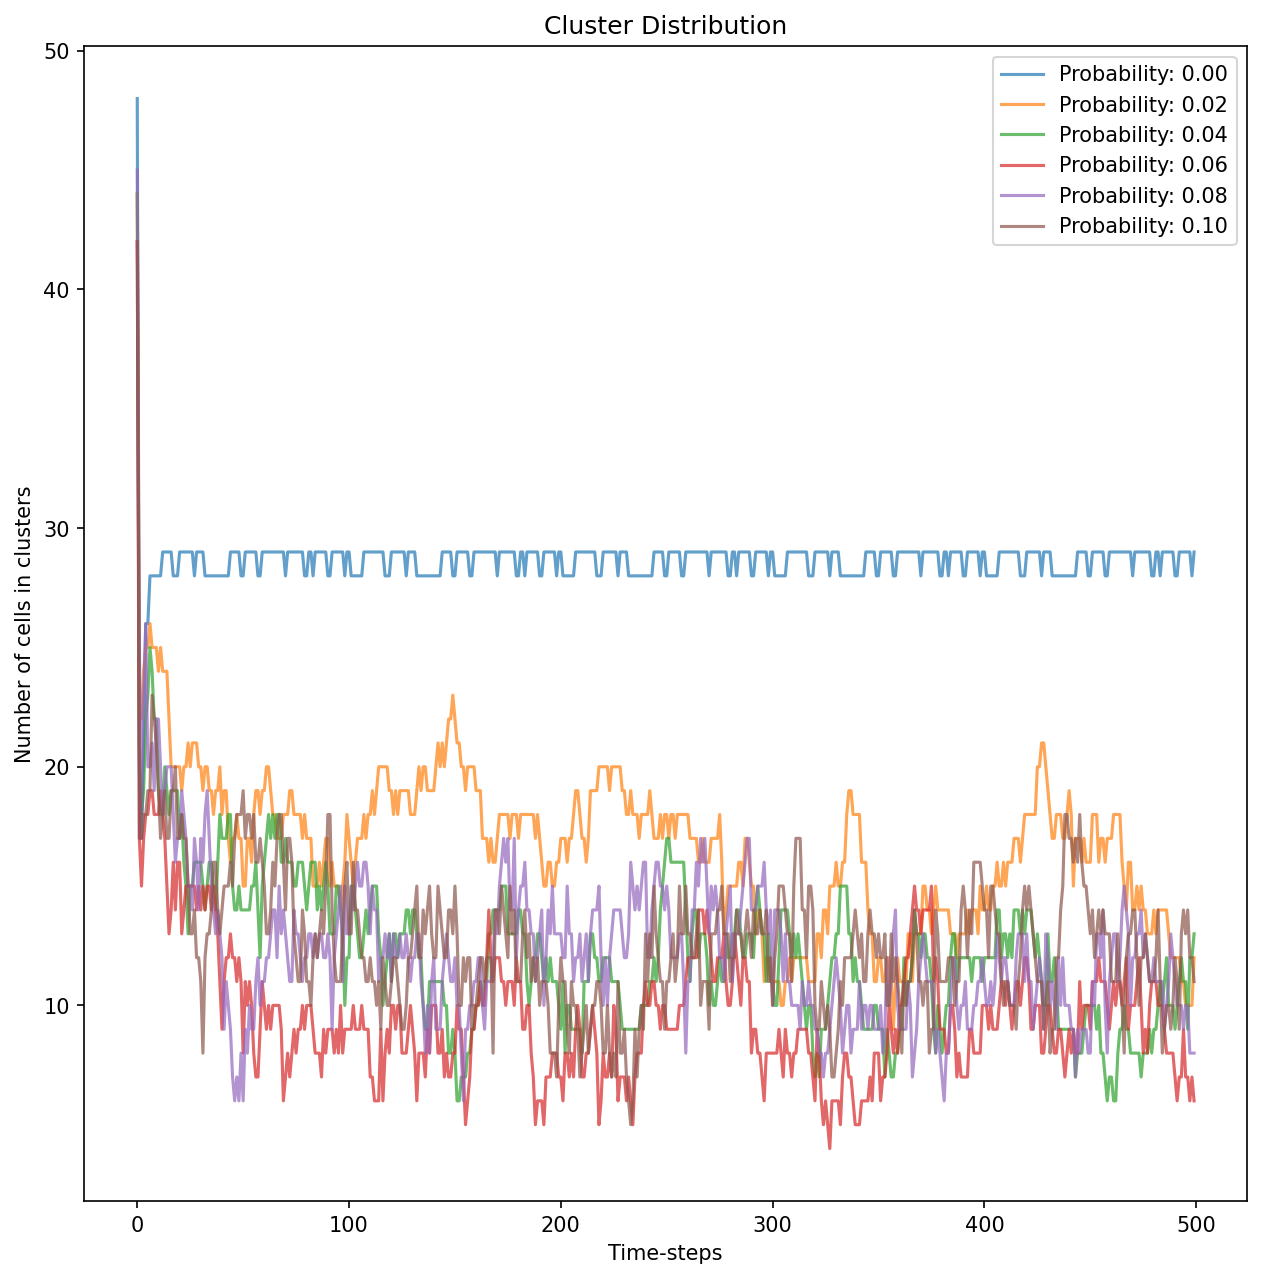

In [21]:
plt.figure(figsize=(10,10), dpi=150)

for p in probabilities:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[1]
    plt.plot(range(tmax), simulation, label = f'Probability: {p:.2f}', alpha = 0.7)
    plt.xlabel('Time-steps')
    plt.ylabel('Number of cells in clusters')
    plt.title('Cluster Distribution')
    plt.legend()

plt.show()

Look at average velocity \
Look at variable braking speeds


# Average cells in cluster vs braking probability

In [22]:
probs = np.linspace(0.01, 0.9, 1000)

cluster_averages = []

for p in probs:
    cluster_list = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[1]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)

# Plotting
plt.plot(probs, cluster_averages)
plt.xlabel('Probability of braking')
plt.ylabel('Average number of cells in clusters')
plt.title('Average cells in cluster vs braking probability')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tualin/anaconda3/envs/CS/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/h3/12fpfwns4px5h7brcggy7t0r0000gn/T/ipykernel_91469/4183851154.py", line 6, in <module>
    cluster_list = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[1]
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tualin/Documents/Uni/Computational Science MSc/Complex Systems Simulation/Project/Traffic_flow_simulation/functions.py", line -1, in Nagel_Schreckenberg
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tualin/anaconda3/envs/CS/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

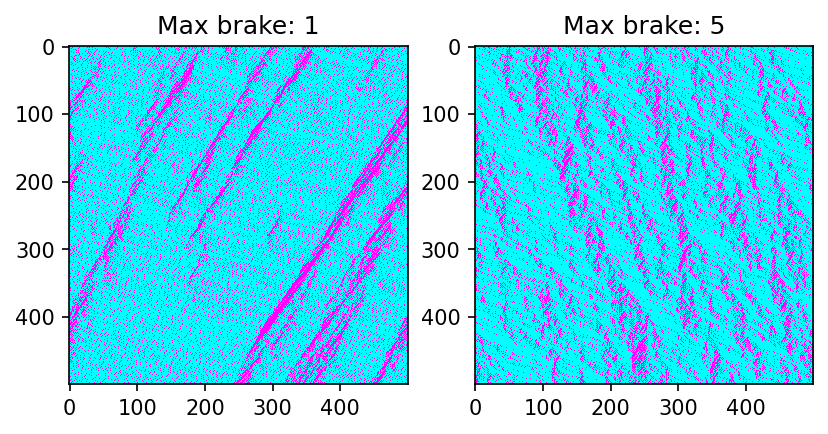

In [33]:
L = 500
N = 100
p = 0.2
vmax = 5
tmax = 500

max_brake_values = [1,5]

fig, axs = plt.subplots(1,len(max_brake_values), dpi = 150)

for brake in max_brake_values:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_brake = brake)[0]
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[max_brake_values.index(brake)].imshow(points, cmap = "cool", interpolation = "nearest")
    axs[max_brake_values.index(brake)].set_title(f'Max brake: {brake}')

plt.show()